In [524]:
import pandas as pd
import matplotlib.pyplot as plt


In [525]:
df = pd.read_csv("dataset.csv")
df

,CustomerID,Age,Gender,Tenure,MonthlyCharges,TotalCharges,ContractType,InternetService,OnlineBackup,TechSupport,PaymentMethod,PaperlessBilling,Churn
0,740,64.0,Male,68,61.13,4149.15,Two Year,Fiber Optic,Yes,No,Mailed Check,Yes,0
1,789,65.0,Male,66,110.36,7320.64,One Year,DSL,No,No,Bank Transfer,No,0
2,44,24.0,Female,10,36.52,209.71,One Year,Fiber Optic,No,No,Bank Transfer,No,0
3,156,30.0,Male,66,41.11,2673.92,Month-to-Month,Fiber Optic,Yes,Yes,Bank Transfer,Yes,0
4,495,49.0,Male,45,56.22,2738.40,One Year,Fiber Optic,No,No,Bank Transfer,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,1045,54.0,Male,61,112.50,6976.11,Month-to-Month,Fiber Optic,No,Yes,Bank Transfer,No,1
1180,1096,29.0,Female,33,80.30,2901.85,Month-to-Month,Fiber Optic,No,Yes,Electronic Check,Yes,1
1181,1131,47.0,Male,38,37.01,1421.40,Month-to-Month,Fiber Optic,Yes,Yes,Bank Transfer,No,0
1182,861,51.0,Female,12,108.16,1185.75,Two Year,Fiber Optic,Yes,No,Electronic Check,Yes,1


In [526]:
df.info

<bound method DataFrame.info of       CustomerID   Age  Gender  Tenure  MonthlyCharges  TotalCharges  \
0            740  64.0    Male      68           61.13       4149.15   
1            789  65.0    Male      66          110.36       7320.64   
2             44  24.0  Female      10           36.52        209.71   
3            156  30.0    Male      66           41.11       2673.92   
4            495  49.0    Male      45           56.22       2738.40   
...          ...   ...     ...     ...             ...           ...   
1179        1045  54.0    Male      61          112.50       6976.11   
1180        1096  29.0  Female      33           80.30       2901.85   
1181        1131  47.0    Male      38           37.01       1421.40   
1182         861  51.0  Female      12          108.16       1185.75   
1183        1127  44.0  Female       3           56.56         54.77   

        ContractType InternetService OnlineBackup TechSupport  \
0           Two Year     Fiber Optic  

In [527]:
df.dtypes

CustomerID            int64
Age                 float64
Gender               object
Tenure                int64
MonthlyCharges      float64
TotalCharges        float64
ContractType         object
InternetService      object
OnlineBackup         object
TechSupport          object
PaymentMethod        object
PaperlessBilling     object
Churn                 int64
dtype: object

In [528]:
ids = df["CustomerID"]
df[ids.isin(ids.duplicated())].sort_values("CustomerID")


,CustomerID,Age,Gender,Tenure,MonthlyCharges,TotalCharges,ContractType,InternetService,OnlineBackup,TechSupport,PaymentMethod,PaperlessBilling,Churn


This means  we don't have any duplicate ids then it is safe tp drop the id collum (we will do it later)

In [529]:
df['Gender'].astype("string")
df.dtypes
df["Gender"].replace(0 , "Male" ,inplace=True)
df["Gender"].replace(1 , "Female" , inplace=True)
#df

C:\Users\Amine\AppData\Local\Temp\ipykernel_37760\13095489.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].replace(0 , "Male" ,inplace=True)
C:\Users\Amine\AppData\Local\Temp\ipykernel_37760\13095489.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [530]:
df["Gender"] = df["Gender"].astype(str).str.strip()
df["Gender"] = df["Gender"].replace({"Male":0, "Female":1})
print(df["Gender"].value_counts())
df["Gender"].unique()

Gender
0        710
1        471
Other      3
Name: count, dtype: int64


array([0, 1, 'Other'], dtype=object)

In [531]:
df = df[~df['Gender'].isin(['Other'])]
print(df["Gender"].value_counts())
df['Gender'] = df['Gender'].astype(int)
df.dtypes

Gender
0    710
1    471
Name: count, dtype: int64


C:\Users\Amine\AppData\Local\Temp\ipykernel_37760\3877749848.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].astype(int)


CustomerID            int64
Age                 float64
Gender                int64
Tenure                int64
MonthlyCharges      float64
TotalCharges        float64
ContractType         object
InternetService      object
OnlineBackup         object
TechSupport          object
PaymentMethod        object
PaperlessBilling     object
Churn                 int64
dtype: object

In [532]:
df["ContractType"].unique()


array(['Two Year', 'One Year', 'Month-to-Month'], dtype=object)

In [533]:
df["InternetService"].unique()

array(['Fiber Optic', 'DSL', 'No'], dtype=object)

In [534]:
df["TechSupport"].unique()

array(['No', 'Yes', nan], dtype=object)

In [535]:
df["PaymentMethod"].unique()

array(['Mailed Check', 'Bank Transfer', 'Electronic Check', 'Credit Card'],
      dtype=object)

In [536]:
# Drop rows where TechSupport is NaN
df = df.dropna(subset=['TechSupport'])

# Verify the count is now 0
print(df["TechSupport"].isna().sum())

# 20 null variables we delete 


0


In [537]:
df["TechSupport"].unique()
df_test = df
df["TechSupport"] = df["TechSupport"].replace({"Yes":1 , "No":0})
df["TechSupport"].unique()


C:\Users\Amine\AppData\Local\Temp\ipykernel_37760\120466078.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["TechSupport"] = df["TechSupport"].replace({"Yes":1 , "No":0})


array([0, 1])

In [538]:
df

,CustomerID,Age,Gender,Tenure,MonthlyCharges,TotalCharges,ContractType,InternetService,OnlineBackup,TechSupport,PaymentMethod,PaperlessBilling,Churn
0,740,64.0,0,68,61.13,4149.15,Two Year,Fiber Optic,Yes,0,Mailed Check,Yes,0
1,789,65.0,0,66,110.36,7320.64,One Year,DSL,No,0,Bank Transfer,No,0
2,44,24.0,1,10,36.52,209.71,One Year,Fiber Optic,No,0,Bank Transfer,No,0
3,156,30.0,0,66,41.11,2673.92,Month-to-Month,Fiber Optic,Yes,1,Bank Transfer,Yes,0
4,495,49.0,0,45,56.22,2738.40,One Year,Fiber Optic,No,0,Bank Transfer,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,1045,54.0,0,61,112.50,6976.11,Month-to-Month,Fiber Optic,No,1,Bank Transfer,No,1
1180,1096,29.0,1,33,80.30,2901.85,Month-to-Month,Fiber Optic,No,1,Electronic Check,Yes,1
1181,1131,47.0,0,38,37.01,1421.40,Month-to-Month,Fiber Optic,Yes,1,Bank Transfer,No,0
1182,861,51.0,1,12,108.16,1185.75,Two Year,Fiber Optic,Yes,0,Electronic Check,Yes,1


In [539]:
df["PaperlessBilling"] = df["PaperlessBilling"].replace({"Yes":1 , "No":0})
df["OnlineBackup"] = df["OnlineBackup"].replace({"Yes":1 , "No":0})
df["TechSupport"] = df["TechSupport"].astype(int)
df["PaperlessBilling"] = df["PaperlessBilling"].astype(int)

C:\Users\Amine\AppData\Local\Temp\ipykernel_37760\2778888026.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["PaperlessBilling"] = df["PaperlessBilling"].replace({"Yes":1 , "No":0})
C:\Users\Amine\AppData\Local\Temp\ipykernel_37760\2778888026.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["OnlineBackup"] = df["OnlineBackup"].replace({"Yes":1 , "No":0})


In [540]:
# Correct syntax: use brackets containing the string name of the column
df = df.dropna(subset=['OnlineBackup'])

# Verify the NaNs are gone
print(df["OnlineBackup"].isna().sum())
df["OnlineBackup"] = df["OnlineBackup"].astype(int)

0


C:\Users\Amine\AppData\Local\Temp\ipykernel_37760\1278212715.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["OnlineBackup"] = df["OnlineBackup"].astype(int)


In [541]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np


cols_to_scale = ["Age" , "MonthlyCharges" ,"TotalCharges" , "Tenure"]
cols_to_scale = [col for col in df.select_dtypes(include=np.number).columns if df[col].max() > 1]

scaler = MinMaxScaler()

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

df

C:\Users\Amine\AppData\Local\Temp\ipykernel_37760\1248663542.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


,CustomerID,Age,Gender,Tenure,MonthlyCharges,TotalCharges,ContractType,InternetService,OnlineBackup,TechSupport,PaymentMethod,PaperlessBilling,Churn
0,0.608731,0.336585,0,0.069,0.011058,0.508555,Two Year,Fiber Optic,1,0,Mailed Check,1,0
1,0.649094,0.341463,0,0.067,0.015956,0.897280,One Year,DSL,0,0,Bank Transfer,0,0
2,0.035420,0.141463,1,0.011,0.008609,0.025704,One Year,Fiber Optic,0,0,Bank Transfer,0,0
3,0.127677,0.170732,0,0.067,0.009066,0.327738,Month-to-Month,Fiber Optic,1,1,Bank Transfer,1,0
4,0.406919,0.263415,0,0.046,0.010569,0.335642,One Year,Fiber Optic,0,0,Bank Transfer,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,0.859967,0.287805,0,0.062,0.016169,0.855052,Month-to-Month,Fiber Optic,0,1,Bank Transfer,0,1
1180,0.901977,0.165854,1,0.034,0.012965,0.355676,Month-to-Month,Fiber Optic,0,1,Electronic Check,1,1
1181,0.930807,0.253659,0,0.039,0.008658,0.174219,Month-to-Month,Fiber Optic,1,1,Bank Transfer,0,0
1182,0.708402,0.273171,1,0.013,0.015737,0.145336,Two Year,Fiber Optic,1,0,Electronic Check,1,1


In [542]:
# 1. Define the columns you want to split
categorical_cols = ['ContractType', 'InternetService', 'PaymentMethod']

# 2. Apply One-Hot Encoding
# dtype=int ensures you get 0 and 1 (which machine learning models prefer)
# instead of True/False
df = pd.get_dummies(df, columns=categorical_cols, dtype=int)

# 3. Check the new columns
print(df.columns)
print(df.head())

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'TotalCharges', 'OnlineBackup', 'TechSupport', 'PaperlessBilling',
       'Churn', 'ContractType_Month-to-Month', 'ContractType_One Year',
       'ContractType_Two Year', 'InternetService_DSL',
       'InternetService_Fiber Optic', 'InternetService_No',
       'PaymentMethod_Bank Transfer', 'PaymentMethod_Credit Card',
       'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check'],
      dtype='object')
   CustomerID       Age  Gender  Tenure  MonthlyCharges  TotalCharges  \
0    0.608731  0.336585       0   0.069        0.011058      0.508555   
1    0.649094  0.341463       0   0.067        0.015956      0.897280   
2    0.035420  0.141463       1   0.011        0.008609      0.025704   
3    0.127677  0.170732       0   0.067        0.009066      0.327738   
4    0.406919  0.263415       0   0.046        0.010569      0.335642   

   OnlineBackup  TechSupport  PaperlessBilling  Churn  \
0             1 

In [543]:
df

,CustomerID,Age,Gender,Tenure,MonthlyCharges,TotalCharges,OnlineBackup,TechSupport,PaperlessBilling,Churn,ContractType_Month-to-Month,ContractType_One Year,ContractType_Two Year,InternetService_DSL,InternetService_Fiber Optic,InternetService_No,PaymentMethod_Bank Transfer,PaymentMethod_Credit Card,PaymentMethod_Electronic Check,PaymentMethod_Mailed Check
0,0.608731,0.336585,0,0.069,0.011058,0.508555,1,0,1,0,0,0,1,0,1,0,0,0,0,1
1,0.649094,0.341463,0,0.067,0.015956,0.897280,0,0,0,0,0,1,0,1,0,0,1,0,0,0
2,0.035420,0.141463,1,0.011,0.008609,0.025704,0,0,0,0,0,1,0,0,1,0,1,0,0,0
3,0.127677,0.170732,0,0.067,0.009066,0.327738,1,1,1,0,1,0,0,0,1,0,1,0,0,0
4,0.406919,0.263415,0,0.046,0.010569,0.335642,0,0,1,0,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,0.859967,0.287805,0,0.062,0.016169,0.855052,0,1,0,1,1,0,0,0,1,0,1,0,0,0
1180,0.901977,0.165854,1,0.034,0.012965,0.355676,0,1,1,1,1,0,0,0,1,0,0,0,1,0
1181,0.930807,0.253659,0,0.039,0.008658,0.174219,1,1,0,0,1,0,0,0,1,0,1,0,0,0
1182,0.708402,0.273171,1,0.013,0.015737,0.145336,1,0,1,1,0,0,1,0,1,0,0,0,1,0


In [544]:
df.dtypes

CustomerID                        float64
Age                               float64
Gender                              int64
Tenure                            float64
MonthlyCharges                    float64
TotalCharges                      float64
OnlineBackup                        int64
TechSupport                         int64
PaperlessBilling                    int64
Churn                               int64
ContractType_Month-to-Month         int64
ContractType_One Year               int64
ContractType_Two Year               int64
InternetService_DSL                 int64
InternetService_Fiber Optic         int64
InternetService_No                  int64
PaymentMethod_Bank Transfer         int64
PaymentMethod_Credit Card           int64
PaymentMethod_Electronic Check      int64
PaymentMethod_Mailed Check          int64
dtype: object

In [545]:
df = df.drop(columns=['CustomerID'])
print(df.columns)

Index(['Age', 'Gender', 'Tenure', 'MonthlyCharges', 'TotalCharges',
       'OnlineBackup', 'TechSupport', 'PaperlessBilling', 'Churn',
       'ContractType_Month-to-Month', 'ContractType_One Year',
       'ContractType_Two Year', 'InternetService_DSL',
       'InternetService_Fiber Optic', 'InternetService_No',
       'PaymentMethod_Bank Transfer', 'PaymentMethod_Credit Card',
       'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check'],
      dtype='object')


In [546]:
df

,Age,Gender,Tenure,MonthlyCharges,TotalCharges,OnlineBackup,TechSupport,PaperlessBilling,Churn,ContractType_Month-to-Month,ContractType_One Year,ContractType_Two Year,InternetService_DSL,InternetService_Fiber Optic,InternetService_No,PaymentMethod_Bank Transfer,PaymentMethod_Credit Card,PaymentMethod_Electronic Check,PaymentMethod_Mailed Check
0,0.336585,0,0.069,0.011058,0.508555,1,0,1,0,0,0,1,0,1,0,0,0,0,1
1,0.341463,0,0.067,0.015956,0.897280,0,0,0,0,0,1,0,1,0,0,1,0,0,0
2,0.141463,1,0.011,0.008609,0.025704,0,0,0,0,0,1,0,0,1,0,1,0,0,0
3,0.170732,0,0.067,0.009066,0.327738,1,1,1,0,1,0,0,0,1,0,1,0,0,0
4,0.263415,0,0.046,0.010569,0.335642,0,0,1,0,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,0.287805,0,0.062,0.016169,0.855052,0,1,0,1,1,0,0,0,1,0,1,0,0,0
1180,0.165854,1,0.034,0.012965,0.355676,0,1,1,1,1,0,0,0,1,0,0,0,1,0
1181,0.253659,0,0.039,0.008658,0.174219,1,1,0,0,1,0,0,0,1,0,1,0,0,0
1182,0.273171,1,0.013,0.015737,0.145336,1,0,1,1,0,0,1,0,1,0,0,0,1,0


In [547]:
df['Churn'].value_counts()

Churn
0    773
1    365
Name: count, dtype: int64

Huge imbalance we need to delete all the extras 

In [548]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Churn"])
Y = df["Churn"]

x_train , x_test ,y_train , y_test = train_test_split(X , Y , test_size=0.2 ,random_state=42 )
print("x :" , x_train.shape)
print("y : ", y_train.shape)

x : (910, 18)
y :  (910,)


In [549]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# 1. Dictionary of models and their specific hyperparameter grids
model_params = {
    'Random_Forest': {
        'model': RandomForestClassifier(random_state=42 , class_weight='balanced'),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
    },
    'Logistic_Regression': {
        'model': LogisticRegression(random_state=42, max_iter=1000 , class_weight='balanced'),
        'params': {
            'C': [0.1, 1, 10],            # Inverse of regularization strength
            'solver': ['liblinear', 'lbfgs']
        }
    },
    'SVM (SVC)': {
        'model': SVC(random_state=42 , class_weight='balanced'),
        'params': {
            'C': [1, 10],
            'kernel': ['rbf', 'linear'],
            'gamma': ['scale']
        }
    }
}

# 2. Loop through the models and run Grid Search
scores = []

for model_name, mp in model_params.items():
    print(f"Training {model_name}...")
    
    clf = GridSearchCV(mp['model'], mp['params'], cv=5,scoring='roc_auc', return_train_score=False)
    clf.fit(x_train, y_train)
    
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

# 3. Create a DataFrame to compare results
import pandas as pd
results_df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Sort by score to see the winner
print("\n--- Model Comparison ---")
print(results_df.sort_values(by='best_score', ascending=False))

Training Random_Forest...
Training Logistic_Regression...
Training SVM (SVC)...

--- Model Comparison ---
                 model  best_score  \
0        Random_Forest    0.709645   
2            SVM (SVC)    0.696202   
1  Logistic_Regression    0.694262   

                                         best_params  
0  {'max_depth': 10, 'min_samples_split': 5, 'n_e...  
2    {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}  
1                  {'C': 0.1, 'solver': 'liblinear'}  


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, f1_score, accuracy_score
from sklearn.model_selection import learning_curve


models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced', random_state=42),
    'Logistic Regression': LogisticRegression(C=1, solver='liblinear', class_weight='balanced', random_state=42),
    'SVM': SVC(C=1, kernel='rbf', probability=True, class_weight='balanced', random_state=42) 
 
}


fig, axes = plt.subplots(3, 3, figsize=(18, 15))
plt.subplots_adjust(hspace=0.4, wspace=0.3)


for i, (name, model) in enumerate(models.items()):
    print(f"Processing {name}...")
    

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:, 1] 

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, i], cbar=False)
    axes[0, i].set_title(f'{name} - Confusion Matrix')
    axes[0, i].set_xlabel('Predicted')
    axes[0, i].set_ylabel('Actual')
    

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    axes[0, i].text(0.5, -0.2, f'Accuracy: {acc:.2f} | F1: {f1:.2f}', 
                    ha='center', transform=axes[0, i].transAxes, fontweight='bold')


    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    axes[1, i].plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    axes[1, i].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[1, i].set_xlim([0.0, 1.0])
    axes[1, i].set_ylim([0.0, 1.05])
    axes[1, i].set_xlabel('False Positive Rate')
    axes[1, i].set_ylabel('True Positive Rate')
    axes[1, i].set_title(f'{name} - ROC Curve')
    axes[1, i].legend(loc="lower right")


    train_sizes, train_scores, test_scores = learning_curve(
        model, x_train, y_train, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy'
    )
    
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    axes[2, i].plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    axes[2, i].plot(train_sizes, test_mean, 'o-', color="g", label="CV score")
    axes[2, i].set_title(f'{name} - Learning Curve')
    axes[2, i].set_xlabel('Training examples')
    axes[2, i].set_ylabel('Accuracy')
    axes[2, i].legend(loc="best")
    axes[2, i].grid(True)

    print(f"--- {name} Classification Report ---")
    print(classification_report(y_test, y_pred))

plt.show()

Processing Random Forest...


In [ ]:
class_0 = df[df['Churn'] == 0]
class_1 = df[df['Churn'] == 1]


count_class_1 = len(class_1)
print(f"Churners count: {count_class_1}")


class_0_under = class_0.sample(count_class_1, random_state=42)

df_test_under = pd.concat([class_0_under, class_1], axis=0)


df_balanced = df_test_under.sample(frac=1, random_state=42).reset_index(drop=True)

print("\nNew Class Counts:")
print(df_balanced['Churn'].value_counts())

Churners count: 365

New Class Counts:
Churn
1    365
0    365
Name: count, dtype: int64


Nuclear option we delete the imbalance since the models are strugeling to learn

In [ ]:
from sklearn.model_selection import train_test_split


X = df_balanced.drop('Churn', axis=1)
y = df_balanced['Churn']


x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"New Training Shape: {x_train.shape}")

New Training Shape: (584, 18)


Processing Random Forest...
--- Random Forest Classification Report ---
              precision    recall  f1-score   support

           0       0.63      0.58      0.60        73
           1       0.61      0.66      0.63        73

    accuracy                           0.62       146
   macro avg       0.62      0.62      0.62       146
weighted avg       0.62      0.62      0.62       146

Processing Logistic Regression...
--- Logistic Regression Classification Report ---
              precision    recall  f1-score   support

           0       0.67      0.62      0.64        73
           1       0.65      0.70      0.67        73

    accuracy                           0.66       146
   macro avg       0.66      0.66      0.66       146
weighted avg       0.66      0.66      0.66       146

Processing SVM...
--- SVM Classification Report ---
              precision    recall  f1-score   support

           0       0.66      0.55      0.60        73
           1       0.61      

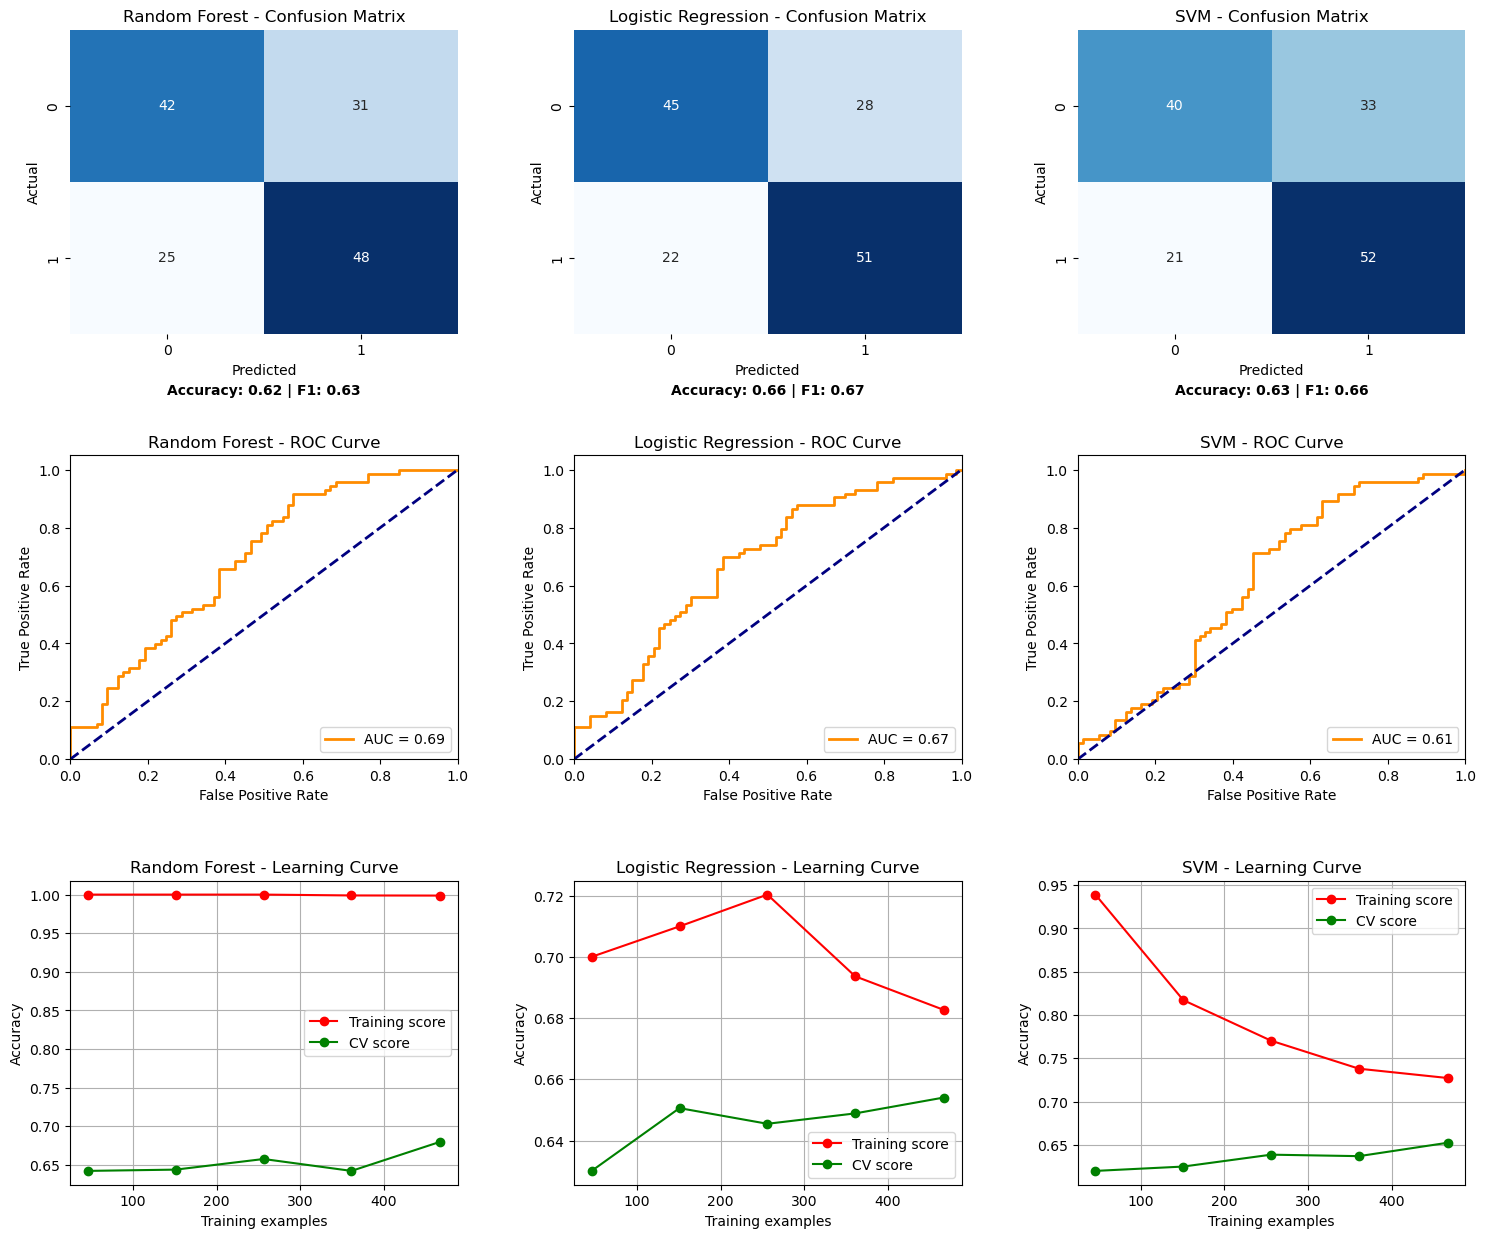

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, f1_score, accuracy_score
from sklearn.model_selection import learning_curve


models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced', random_state=42),
    'Logistic Regression': LogisticRegression(C=1, solver='liblinear', class_weight='balanced', random_state=42),
    'SVM': SVC(C=1, kernel='rbf', probability=True, class_weight='balanced', random_state=42) 
 
}


fig, axes = plt.subplots(3, 3, figsize=(18, 15))
plt.subplots_adjust(hspace=0.4, wspace=0.3)


for i, (name, model) in enumerate(models.items()):
    print(f"Processing {name}...")
    

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:, 1] 

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, i], cbar=False)
    axes[0, i].set_title(f'{name} - Confusion Matrix')
    axes[0, i].set_xlabel('Predicted')
    axes[0, i].set_ylabel('Actual')
    

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    axes[0, i].text(0.5, -0.2, f'Accuracy: {acc:.2f} | F1: {f1:.2f}', 
                    ha='center', transform=axes[0, i].transAxes, fontweight='bold')


    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    axes[1, i].plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    axes[1, i].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[1, i].set_xlim([0.0, 1.0])
    axes[1, i].set_ylim([0.0, 1.05])
    axes[1, i].set_xlabel('False Positive Rate')
    axes[1, i].set_ylabel('True Positive Rate')
    axes[1, i].set_title(f'{name} - ROC Curve')
    axes[1, i].legend(loc="lower right")


    train_sizes, train_scores, test_scores = learning_curve(
        model, x_train, y_train, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy'
    )
    
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    axes[2, i].plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    axes[2, i].plot(train_sizes, test_mean, 'o-', color="g", label="CV score")
    axes[2, i].set_title(f'{name} - Learning Curve')
    axes[2, i].set_xlabel('Training examples')
    axes[2, i].set_ylabel('Accuracy')
    axes[2, i].legend(loc="best")
    axes[2, i].grid(True)

    print(f"--- {name} Classification Report ---")
    print(classification_report(y_test, y_pred))

plt.show()

Logistical regression won now we are gonna fine tune it 

In [ ]:
param_grid = [
    {
        'solver': ['liblinear', 'saga'], 
        'penalty': ['l1'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'class_weight': [None, 'balanced']
    },

    {
        'solver': ['liblinear', 'newton-cg', 'lbfgs', 'saga'], 
        'penalty': ['l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'class_weight': [None, 'balanced']
    },
 
    {
        'solver': ['saga'],
        'penalty': ['elasticnet'],
        'C': [0.01, 0.1, 1, 10],
        'l1_ratio': [0.2, 0.5, 0.8], 
        'class_weight': [None, 'balanced']
    }
]


lr = LogisticRegression(max_iter=5000, random_state=42)


grid_search = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    cv=5,
    scoring={'f1': 'f1', 'precision': 'precision', 'accuracy': 'accuracy'},
    refit='f1',  
    n_jobs=-1,
    return_train_score=False
)

print("Starting extensive tuning ")
grid_search.fit(x_train, y_train)
print("WE FINISHED")

Starting extensive tuning 
WE FINISHED


In [ ]:

results = pd.DataFrame(grid_search.cv_results_)



cols_to_keep = ['params', 'mean_test_f1', 'mean_test_precision', 'mean_test_accuracy', 'rank_test_f1']
results_df = results[cols_to_keep]


params_df = pd.json_normalize(results_df['params'])
results_df = pd.concat([params_df, results_df.drop(columns=['params'])], axis=1)


results_df = results_df.rename(columns={
    'mean_test_f1': 'F1 Score',
    'mean_test_precision': 'Precision',
    'mean_test_accuracy': 'Accuracy'
})


results_df = results_df.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)


print("--- Top 10 Models ---")
print(results_df.head(10))



--- Top 10 Models ---
      C class_weight     penalty     solver  l1_ratio  F1 Score  Precision  \
0  0.10     balanced          l1       saga       NaN  0.687095   0.652075   
1  0.10         None          l1       saga       NaN  0.687095   0.652075   
2  0.01     balanced  elasticnet       saga       0.2  0.687095   0.652075   
3  0.01         None  elasticnet       saga       0.2  0.687095   0.652075   
4  0.10     balanced  elasticnet       saga       0.8  0.677855   0.650523   
5  0.10         None  elasticnet       saga       0.8  0.677855   0.650523   
6  0.10     balanced          l1  liblinear       NaN  0.676899   0.654379   
7  0.10         None          l1  liblinear       NaN  0.676899   0.654379   
8  0.10     balanced  elasticnet       saga       0.5  0.676899   0.654379   
9  0.10         None  elasticnet       saga       0.5  0.674742   0.653396   

   Accuracy  rank_test_f1  
0  0.669496             1  
1  0.669496             1  
2  0.669496             1  
3  0.66


--- Best Parameters Found ---
{'C': 0.1, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}

--- Final Test Report ---
              precision    recall  f1-score   support

           0       0.66      0.56      0.61        73
           1       0.62      0.71      0.66        73

    accuracy                           0.64       146
   macro avg       0.64      0.64      0.63       146
weighted avg       0.64      0.64      0.63       146



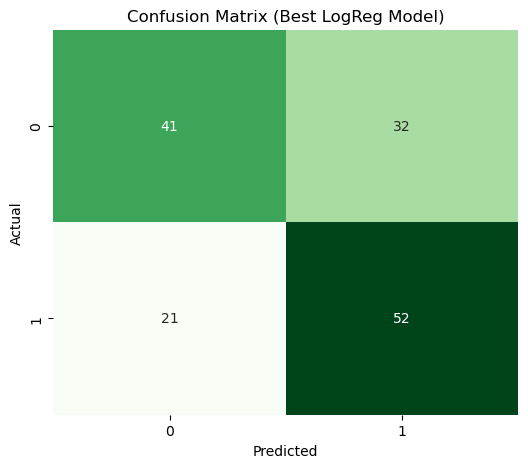

In [ ]:

best_lr = grid_search.best_estimator_

print(f"\n--- Best Parameters Found ---")
print(grid_search.best_params_)


y_pred = best_lr.predict(x_test)


print("\n--- Final Test Report ---")
print(classification_report(y_test, y_pred))


plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix (Best LogReg Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

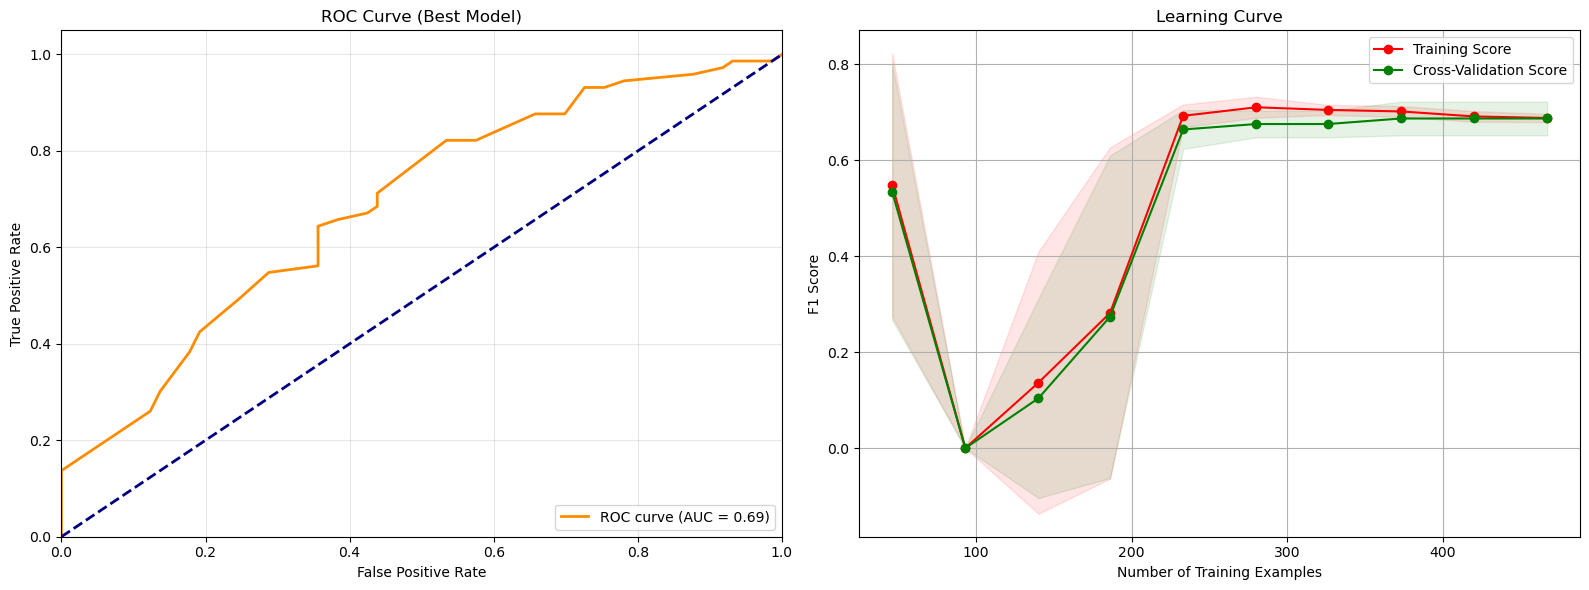

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))


y_prob = best_lr.predict_proba(x_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

axes[0].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') 
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve (Best Model)')
axes[0].legend(loc="lower right")
axes[0].grid(True, alpha=0.3)


train_sizes, train_scores, test_scores = learning_curve(
    best_lr, x_train, y_train, 
    cv=5, 
    n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10), 
    scoring='f1' 
)


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

axes[1].plot(train_sizes, train_mean, 'o-', color="r", label="Training Score")
axes[1].plot(train_sizes, test_mean, 'o-', color="g", label="Cross-Validation Score")


axes[1].fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
axes[1].fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

axes[1].set_title('Learning Curve')
axes[1].set_xlabel('Number of Training Examples')
axes[1].set_ylabel('F1 Score')
axes[1].legend(loc="best")
axes[1].grid(True)

plt.tight_layout()
plt.show()

Not satisfied with the final results